### SA on sentences w/ medication
http://textminingonline.com/dive-into-nltk-part-ix-from-text-classification-to-sentiment-analysis

In [5]:
# Trained with nltk movie_reviews

In [57]:
import nltk
from nltk.corpus import movie_reviews
from random import shuffle
from nltk import tokenize
from nltk.tokenize import RegexpTokenizer
from stop_words import get_stop_words
from nltk.stem.porter import PorterStemmer
from gensim import corpora, models
import pandas as pd
import gensim
import nltk
import numbers
from nltk.sentiment.vader import SentimentIntensityAnalyzer

/Users/elenajia/anaconda/lib/python3.6/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [58]:
def document_features(document):
    document_words = set(document)
    features = {}
    for word in word_features:
        features['contains(%s)' % word] = (word in document_words)
    return features

In [7]:
documents = [(list(movie_reviews.words(fileid)), category) 
for category in movie_reviews.categories()
for fileid in movie_reviews.fileids(category)]

In [8]:
shuffle(documents)

In [9]:
print (documents[0])

(['synopsis', ':', 'leonard', 'shelby', '(', 'pearce', ')', 'is', 'a', 'former', 'insurance', 'investigator', 'on', 'the', 'trail', 'of', 'the', 'man', 'who', 'killed', 'his', 'wife', '.', 'leonard', 'has', 'only', 'a', 'few', 'clues', 'to', 'the', 'murderer', "'", 's', 'identity', ';', 'to', 'make', 'matters', 'worse', ',', 'he', 'suffers', 'from', 'a', 'condition', 'which', 'inhibits', 'the', 'creation', 'of', 'short', '-', 'term', 'memories', ',', 'meaning', 'that', 'leonard', 'is', 'always', 'forgetting', 'what', 'happened', 'just', 'minutes', 'earlier', '.', 'because', 'of', 'this', ',', 'leonard', 'is', 'forced', 'to', 'rely', 'on', 'notes', 'he', 'leaves', 'for', 'himself', '.', '"', 'memento', '"', 'traces', 'the', 'investigation', 'back', 'in', 'time', 'from', 'its', 'apparent', 'culmination', '.', 'review', ':', '"', 'memento', '"', 'is', 'the', 'sort', 'of', 'movie', 'i', 'wish', 'i', "'", 'd', 'written', ';', 'i', 'can', 'think', 'of', 'no', 'higher', 'praise', 'than', 'tha

In [10]:
len(documents)

2000

In [11]:
all_words = nltk.FreqDist(w.lower() for w in movie_reviews.words())

In [12]:
# word_features = all_words.keys()[:2000]
word_features = list(all_words.keys())[:2000]

In [61]:
len(featuresets)

2000

In [62]:
# print (document_features(movie_reviews.words('pos/cv957_8737.txt')))

In [63]:
featuresets = [(document_features(d), c) for (d, c) in documents]

In [64]:
train_set, test_set = featuresets[100:], featuresets[:100]

In [65]:
# classifier = nltk.NaiveBayesClassifier.train(train_set)

full_classifier = nltk.NaiveBayesClassifier.train(featuresets)

In [66]:
print (nltk.classify.accuracy(classifier, test_set))

0.8


In [19]:
classifier.show_most_informative_features(10)

Most Informative Features
        contains(sexist) = True              neg : pos    =      7.6 : 1.0
 contains(unimaginative) = True              neg : pos    =      7.6 : 1.0
       contains(martian) = True              neg : pos    =      7.6 : 1.0
    contains(schumacher) = True              neg : pos    =      7.3 : 1.0
        contains(suvari) = True              neg : pos    =      6.9 : 1.0
     contains(atrocious) = True              neg : pos    =      6.9 : 1.0
          contains(mena) = True              neg : pos    =      6.9 : 1.0
        contains(shoddy) = True              neg : pos    =      6.9 : 1.0
        contains(turkey) = True              neg : pos    =      6.5 : 1.0
       contains(singers) = True              pos : neg    =      5.7 : 1.0


### test

In [67]:
df1 = pd.read_csv('s_med.csv')

In [3]:
sent_a = list(df1['med_sentence'].values)

In [75]:
res_s_dic = []
# res_s_dic1 = []

df_res_s = pd.DataFrame([])

sid = SentimentIntensityAnalyzer()

for i, sentence in enumerate(sent_a[:500]):
    test_set = document_features(sentence.split())  #TODO: change to tokenize
    # res_s_dic1.append(classifier.classify(test_set))
    
    prob_result = full_classifier.prob_classify(test_set)
    
#     dic = {}
#     dic["s"] = sentence
#     dic["neg"] = prob_result.prob("neg")
#     dic["pos"] = prob_result.prob("pos")
    
#     res_s_dic.append(dic)
    df_res_s.loc[i,'neg_prob'] = prob_result.prob("neg")
    df_res_s.loc[i,'pos_prob'] = prob_result.prob("pos")
    
    sid_s = sid.polarity_scores(sentence)
    df_res_s.loc[i,'neg_vader'] = sid_s['neg']
    df_res_s.loc[i,'neu_vader'] = sid_s['neu']
    df_res_s.loc[i,'pos_vader'] = sid_s['pos']
    
    df_res_s.loc[i,'sentence'] = sentence
    
# df_res_s[df_res_s['pos_prob'] > .001]['sentence']
print(df_res_s['pos_prob'].max())
print(df_res_s['pos_vader'].max())
df_res_s.to_csv('s_med_with_score_first500.csv')
# print (res_s_dic)

0.0857200461554
0.481


0.0857200461554
0.481


In [53]:
prob_result = classifier.prob_classify(document_features(str('I love it! This is great!!!').split()))
print(prob_result.prob("neg"), prob_result.prob("pos"))


0.9999933488186242 6.651181374692312e-06


In [30]:
df_res_s = pd.DataFrame(res_s_dic)
# print (df_res_s)

df_res_s.to_csv('s_med_with_score_first100.csv')

In [21]:
import seaborn as sns
%matplotlib inline
sns.set_style("whitegrid")

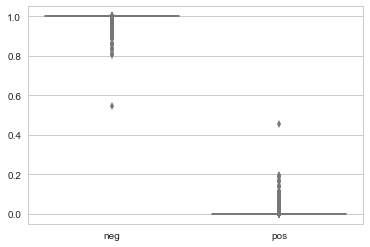

In [22]:
ax = sns.boxplot(data= df_res_s,palette="PRGn")

#### posts

In [23]:
df2 = pd.read_csv('p_med.csv')

In [24]:
post_a = list(df2['selftext'].values)

In [23]:
# res_p_dic = []
# res_p_dic1 = []


# for p in post_a:
#     test_set = document_features(str(p).split())
#     # res_s_dic1.append(classifier.classify(test_set))
    
#     prob_result = classifier.prob_classify(test_set)
    
#     dic = {}
#     dic["z_p"] = p
#     dic["neg"] = prob_result.prob("neg")
#     dic["pos"] = prob_result.prob("pos")
    
#     res_p_dic.append(dic)
    
# print (res_p_dic)

In [28]:
df_res_p = pd.DataFrame(res_p_dic)
print (df_res_p)

           neg       pos                                                z_p
0     0.995418  0.004582  Second day on drugs and it has already started...
1     0.995187  0.004813  I'm not sure where to start. I've been lurking...
2     0.999146  0.000854  I'm a 23 year old female and I've been battlin...
3     0.855427  0.144573  A bit of a strange question, I suppose, but he...
4     0.999994  0.000006  Has anyone ever had this experience that nothi...
5     0.996587  0.003413  To start, I'm using a throwaway/anonymous acco...
6     0.998594  0.001406  I've always what I'd consider moderate anxiety...
7     0.995042  0.004958  Hey everyone. I've been lurking here for aroun...
8     0.565337  0.434663  I have GAD, I have had many anxieties come and...
9     0.310329  0.689671  I have a nearly impossible time saying no to a...
10    0.998759  0.001241  I've been working with my doctor over the past...
11    0.156367  0.843633  **Actual experiences with meds will be quoted,...
12    0.9961

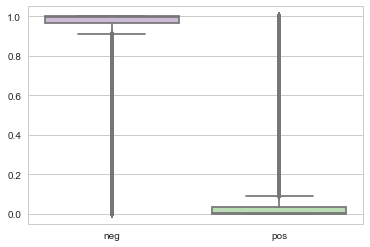

In [29]:
ax_2 = sns.boxplot(data= df_res_p,palette="PRGn")